In [1]:

# Import the necessary libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob

# Re-size all the images to this size
IMAGE_SIZE = [299, 299]  # InceptionV3 prefers 299x299 images

# Relative paths for train and validation datasets
train_path = '../Datasets/New Plant Diseases Dataset(Augmented)/train'
valid_path = '../Datasets/New Plant Diseases Dataset(Augmented)/valid'

# Load InceptionV3 pre-trained model (without the top layers)
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze the existing weights
for layer in inception.layers:
    layer.trainable = False

# Get the number of output classes
folders = glob(train_path + '/*')

# Add custom layers
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

# Create the model object
model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [2]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data preprocessing for the validation set
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation datasets
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

validation_set = test_datagen.flow_from_directory(
    valid_path,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
r = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(validation_set)
)


Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.
Epoch 1/10
574/574 [==============================] - 3975s 7s/step - loss: 4.3148 - accuracy: 0.7308 - val_loss: 2.5463 - val_accuracy: 0.8236
Epoch 2/10
574/574 [==============================] - 3826s 7s/step - loss: 3.2404 - accuracy: 0.8355 - val_loss: 6.0632 - val_accuracy: 0.7845
Epoch 3/10
574/574 [==============================] - 4740s 8s/step - loss: 2.5975 - accuracy: 0.8790 - val_loss: 2.3479 - val_accuracy: 0.8822
Epoch 4/10
574/574 [==============================] - 4103s 7s/step - loss: 2.5506 - accuracy: 0.8873 - val_loss: 3.4691 - val_accuracy: 0.8587
Epoch 5/10
574/574 [==============================] - 4241s 7s/step - loss: 2.3691 - accuracy: 0.9010 - val_loss: 5.3203 - val_accuracy: 0.8297
Epoch 6/10
574/574 [==============================] - 3467s 6s/step - loss: 2.2768 - accuracy: 0.9102 - val_loss: 2.2786 - val_accuracy: 0.9029
Epoch 7/10
574/574 [=============================

In [3]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(validation_set)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

144/144 [==============================] - 495s 3s/step - loss: 3.3364 - accuracy: 0.9027
Validation Loss: 3.336381435394287
Validation Accuracy: 0.9027262926101685


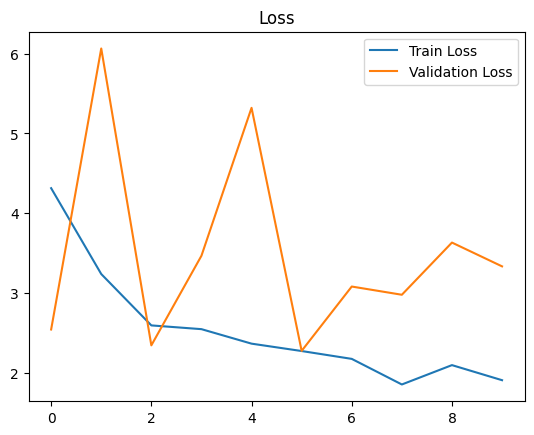

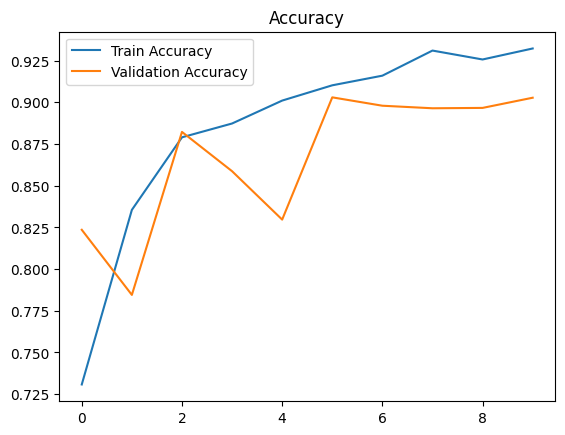

In [4]:
# Importing matplotlib to plot the results
import matplotlib.pyplot as plt

# Plot loss
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Plot accuracy
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [5]:
model.save('../Models/Inception_model.h5')